In [200]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Homework 1

## 1

In [201]:
deg=20

In [202]:
G=nx.empty_graph(deg)

## 2 Freeman formula using degree centrality

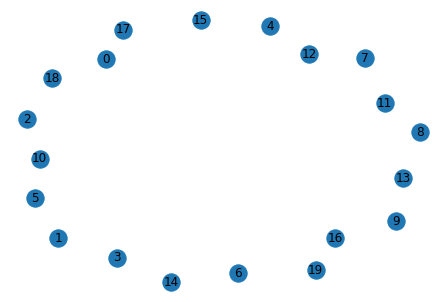

In [203]:
nx.draw(G, with_labels=True)
plt.show()

## 3

In [204]:
Freeman=np.zeros(deg*(deg-1)//2)

In [205]:
for i in range(len(Freeman)):
    nonedges = list(nx.non_edges(G))
    to_add=random.choice(nonedges)
    G.add_edge(to_add[0],to_add[1])
    centrality=nx.closeness_centrality(G)
    Freeman[i]=(deg*max(centrality.values())-sum(centrality.values()))/(deg-2)

## 4

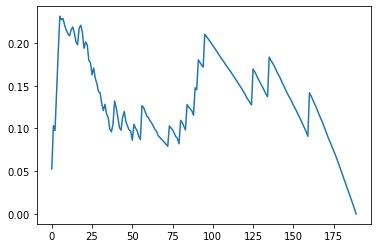

In [206]:
plt.plot(np.arange(0,deg*(deg-1)//2,1),Freeman)

# Homework 2

1. Q: Wchich nodes are most central? A: Depends on measure of centrality, but usually such nodes have big degrees compared to the rest of the nodes and their connections are often the only way to get to the other nodes.
2. Q: How evenly is centrality distributed among nodes? A: To measure this we can use HITS algorithm. It is used for directed graph. There are two ways to be important in network: to be authority(a lot of edges in) or hub(a lot of edges out). It is also important how important you neighbours are. If you get a link from important hub or if you link to important authority then you also are more important.

# Homework 3

In [207]:
data = pd.read_csv('drosophhila_net.csv', delimiter='\t')
G = nx.Graph()
E = np.array(data.iloc[:, [0, 1]])
G.add_edges_from(E)
N = len(G.nodes())

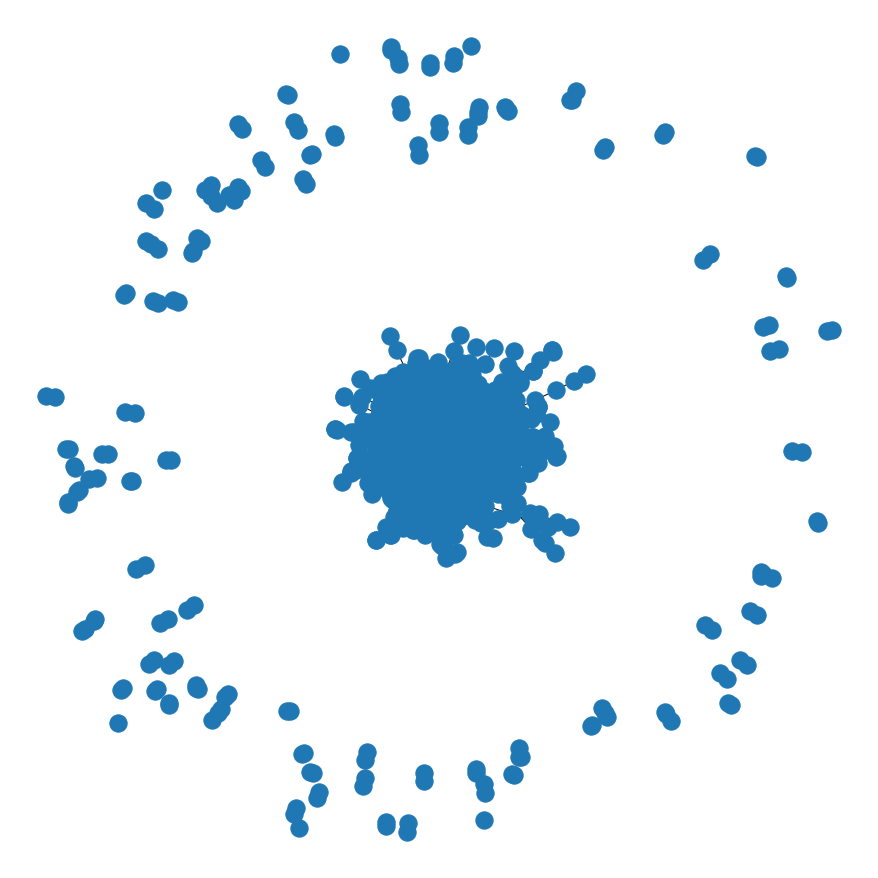

In [208]:
plt.figure(figsize=(12, 12))
nx.draw(G)

# check scale

In [209]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test

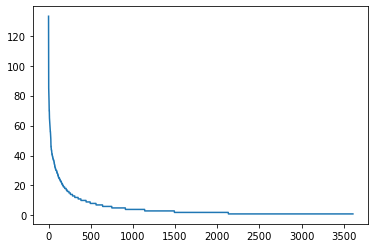

In [210]:
plt.plot(degree_sequence)

In [211]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α answer from https://stackoverflow.com/questions/49908014/how-can-i-check-if-a-network-is-scale-free
fit = powerlaw.Fit(degree_sequence,xmin=1, discrete = True) 

/home/olaf/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


/home/olaf/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


<AxesSubplot:>

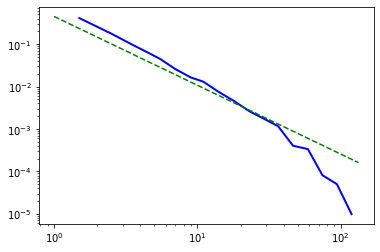

In [212]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

In [213]:
fit.power_law.sigma

0.010339668081270115

Sigma is small so i think it is scale free.

# find important

In [214]:
pagerank = nx.pagerank(G)
pagerank_v = [v for k, v in pagerank.items()]
pagerank_k = np.array([k for k, v in pagerank.items()])
pagerank=pagerank_k[np.argsort(pagerank_v)[-10:]]
pagerank

array(['FBgn0031768', 'FBgn0039856', 'FBgn0032773', 'FBgn0030668',
       'FBgn0264087', 'FBgn0025637', 'FBgn0004107', 'FBgn0038172',
       'FBgn0027364', 'FBgn0042102'], dtype='<U11')

In [215]:
hitsrank = nx.hits(G)[0]
hitsrank_v = [v for k, v in hitsrank.items()]
hitsrank_k = np.array([k for k, v in hitsrank.items()])
hitsrank=hitsrank_k[np.argsort(hitsrank_v)[-10:]]
hitsrank

array(['FBgn0003114', 'FBgn0028509', 'FBgn0030668', 'FBgn0004107',
       'FBgn0037345', 'FBgn0026371', 'FBgn0016131', 'FBgn0042102',
       'FBgn0025674', 'FBgn0039858'], dtype='<U11')

In [216]:
np.intersect1d(hitsrank,pagerank)

array(['FBgn0004107', 'FBgn0030668', 'FBgn0042102'], dtype='<U11')

this 3 nodes FBgn0004107, FBgn0030668, FBgn0042102 are important.

# Homework 4

We used Cytoscape with clusterMaker app and runned MCL and MCODE. All Images show clusters with number of elements greater than 6. We achieved that by using topological filter to find nodes with at least 6 neighbours in distance 5.

<div>
<img src="drosophhila_net.csv--clustered--cut02.png".png"/>
<center>MCODE for cutoff=0.2 </center>
</div>

<div>
<img src="drosophhila_net.csv--clustered--cut04.png".png"/>
<center>MCODE for cutoff=0.4 </center>
</div>

<div>
    <img src="drosophhila_net.csv--clustered-mcl-2.5.png"/>
<center>MCL for granularity=2.5 </center>
</div>

<div>
<img src="drosophhila_net.csv--clustered-mcl-1-5.png"/>
<center>MCL for granularity=1.5 </center>
</div>

As we can see the MCL finds more big clusters than MCODE. By increasing cutoff for MCODE we achieved bigger network. By increasing granularity for MCL we found less clusters but more nodes overall went to one big cluster. 